<a href="https://colab.research.google.com/github/bits-and-bytes85/satellite-convneuralnetwork/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from keras.models import Sequential
from keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from sklearn.metrics import confusion_matrix , classification_report, ConfusionMatrixDisplay
import seaborn

from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#unzipping dataset
!unzip /content/archive.zip



Archive:  /content/archive.zip
replace data/cloudy/train_10021.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset = '/content/data'
labels = os.listdir(dataset)
labels

['green_area', 'water', 'cloudy', 'desert']

In [ ]:
#initializing metrics for the model
epochs = 10
batch_size = 32
learning_rate = 0.0001

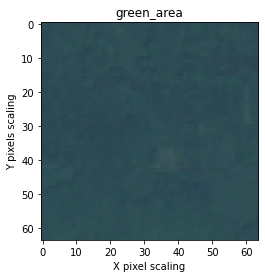

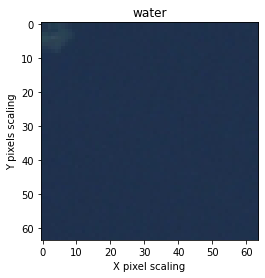

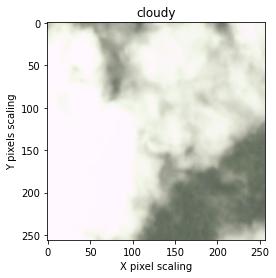

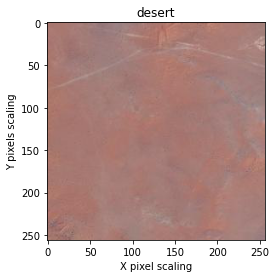

In [ ]:
#Prints out example images from the dataset for each category
for label in labels:
    path = os.listdir(dataset + '/' + label)
    img = dataset + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [ ]:
#formatting the images to make them standardized
standardized_data = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, #randomly zooms image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        rescale=1./255,#scale images
        validation_split=0.2) #split data


In [ ]:
#splitting the original dataset into training and test datasets
#training is 80% of the original data and test is 20% of the data

train_data=standardized_data.flow_from_directory(dataset,
                                       target_size=(64,64),
                                       batch_size=32,
                                       class_mode='categorical',
                                       shuffle=True,subset='training')

test_data=standardized_data.flow_from_directory(dataset,
                                       target_size=(64,64),
                                       batch_size=1,
                                       shuffle=False,subset='validation')

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
#initializing the CNN model
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(64,64, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=4, activation="softmax"))

#compiling the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Creating and training the CNN
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=20, 
                    callbacks=[callback])


Epoch 1/20
141/141 [==============================] - 24s 109ms/step - loss: 0.9935 - accuracy: 0.7820 - val_loss: 2.1266 - val_accuracy: 0.2691
Epoch 2/20
141/141 [==============================] - 17s 121ms/step - loss: 0.5578 - accuracy: 0.8684 - val_loss: 2.0977 - val_accuracy: 0.5018
Epoch 3/20
141/141 [==============================] - 15s 110ms/step - loss: 0.3874 - accuracy: 0.8866 - val_loss: 1.7745 - val_accuracy: 0.6252
Epoch 4/20
141/141 [==============================] - 15s 105ms/step - loss: 0.3204 - accuracy: 0.9152 - val_loss: 0.7327 - val_accuracy: 0.6687
Epoch 5/20
141/141 [==============================] - 15s 105ms/step - loss: 0.2855 - accuracy: 0.9230 - val_loss: 0.1892 - val_accuracy: 0.9254
Epoch 6/20
141/141 [==============================] - 15s 105ms/step - loss: 0.2911 - accuracy: 0.9250 - val_loss: 0.8078 - val_accuracy: 0.7771
Epoch 7/20
141/141 [==============================] - 15s 105ms/step - loss: 0.3008 - accuracy: 0.9316 - val_loss: 2.6163 - val_ac

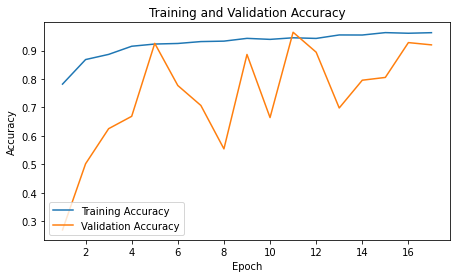

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')
plt.show()